In [1]:
import os
os.chdir('../')

from GenStudentMixtures.Mixture_Multivariate_Student_Generalized import MMST
from GenStudentMixtures.Multivariate_Student_Generalized import MST

from GenStudentMixtures.GenStudentMixtures import GenStudentMixtures
from GenStudentMixtures.GenStudentMixturesEMStandard import MixtureMultipleScaleDistribution

from pymanopt.solvers import ConjugateGradient, SteepestDescent

import numpy as np
from numpy.random import shuffle

from scipy.stats import ortho_group

import matplotlib.pyplot as plt

# Import r code for trimkmeans
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

r = robjects.r
r['source']('TKM.R')
trimkmeans = robjects.globalenv['trimkmeans']

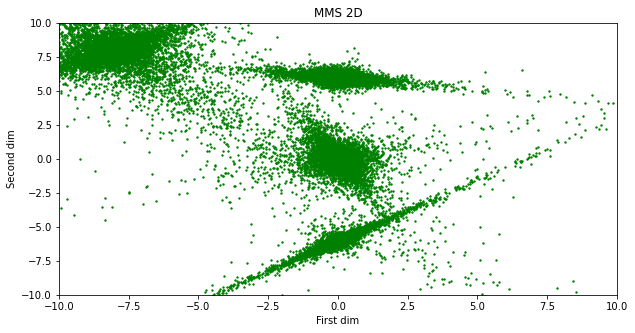

In [2]:
# pi_24 = np.array([.1, .2, .3, .4], dtype=np.float64)
pi_24 = np.array([.18, .2, .28, .34], dtype=np.float64)
mu_24 = np.array([[0, -6], [0, 0], [0, 6], [-8, 8]], dtype=np.float64)
angle = np.pi / 6
matRot_24 = [[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]]
matRot_24_2 = [[np.cos(np.pi/2), -np.sin(np.pi/2)], [np.sin(np.pi/2), np.cos(np.pi/2)]]
#D_24 = np.array([matRot_24, matRot_24, matRot_24, matRot_24_2], dtype=np.float64)
D_24 = np.array([ortho_group.rvs(dim=2), ortho_group.rvs(dim=2), ortho_group.rvs(dim=2), ortho_group.rvs(dim=2)], dtype=np.float64)
A_24 = np.array([[.2, .01], [.1, .5], [.05, .2], [.18, .9]], dtype=np.float64)
nu_24 = np.array([[1, 2], [1.5, 2], [6, 2], [0.5, 3]], dtype=np.float64)

gen_mix_24, _ = MMST(pi_24, mu_24, A_24, D_24, nu_24).sample(1000000)

plt.figure(figsize=(10, 5))

plt.scatter(gen_mix_24[:30000, 0], gen_mix_24[:30000, 1], s=1.9, c='green')

plt.xlim(-10, 10)
plt.xlabel('First dim')

plt.ylim(-10, 10)
plt.ylabel('Second dim')

plt.title('MMS 2D')
plt.show()

In [3]:
### Online EM ###

# Solver
solver1 = ConjugateGradient(beta_rule='PolakRibiere', max_iterations=1000, verbosity=0)

# Learning rates
gam = (1-10e-10)*np.array([k for k in range(1, len(gen_mix_24) + 1)]) ** (-6/10)

# Training
model_24 = GenStudentMixtures(4, solver1, max_iterations=3500)
model_24.fit(gen_mix_24, gam, 200)

 15%|█████▉                                  | 736/4999 [00:42<04:04, 17.47it/s]


KeyboardInterrupt: 

In [ ]:
### Standard EM ###
model = MixtureMultipleScaleDistribution(4, max_iter=1000, verbose=1)
model.fit(np.array(gen_mix_24[:30000], dtype=np.float32))

  2%|▋                                      | 19/1000 [01:45<1:17:27,  4.74s/it]

Iteration 19 decreased log-likelihood


  2%|▊                                      | 21/1000 [01:53<1:14:19,  4.56s/it]

Iteration 21 decreased log-likelihood


  2%|▉                                      | 23/1000 [02:02<1:14:05,  4.55s/it]

In [ ]:
model.get_parameters()